In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Load data

In [2]:
df = pd.read_csv('Data/heart-disease.csv')
df.shape,
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.isnull().sum()   

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## EDA - Exploratory Data Analysis

In [4]:
df.target.value_counts()

target
1    165
0    138
Name: count, dtype: int64

<Axes: xlabel='target'>

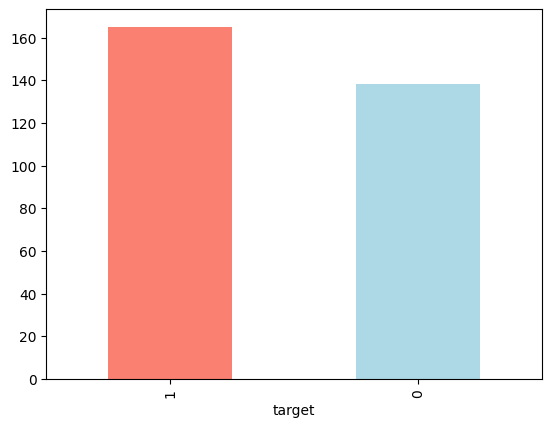

In [5]:
df.target.value_counts().plot(kind='bar' ,color=["salmon", "lightblue"])

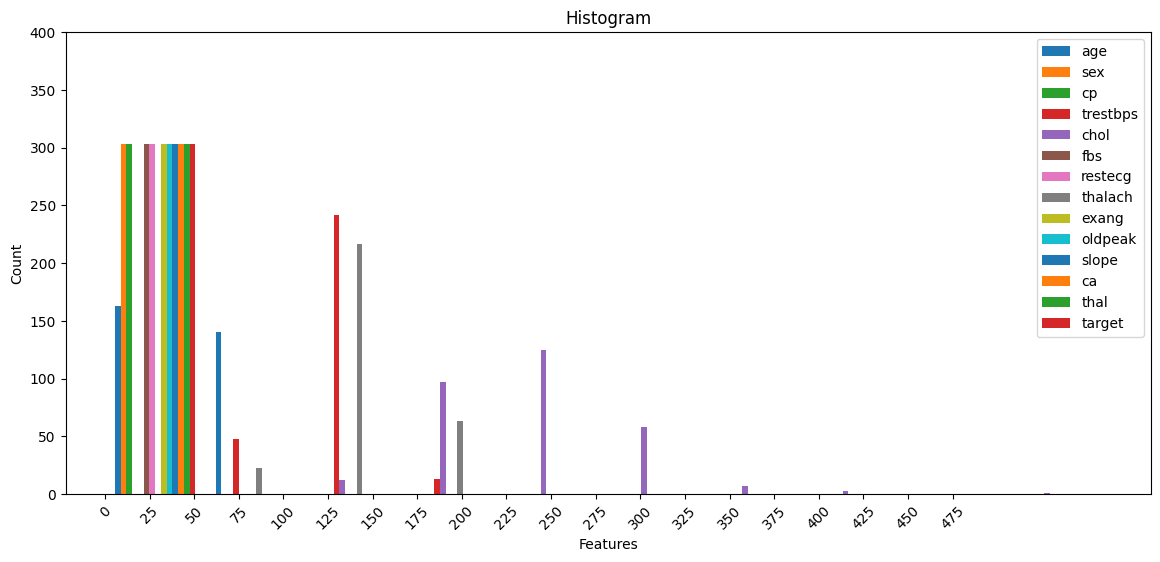

In [6]:
plt.figure(figsize = (14,6))
plt.hist(df )
plt.xlabel('Features')
plt.ylabel('Count')
plt.title('Histogram')
plt.ylim(0, 400)
plt.xticks(ticks=np.arange(0, 500 , 25) , rotation=45)
plt.legend(df.columns)
plt.show()

Frequency of sex

In [7]:
df.sex.value_counts()

# 1 - male
# 0 - female

sex
1    207
0     96
Name: count, dtype: int64

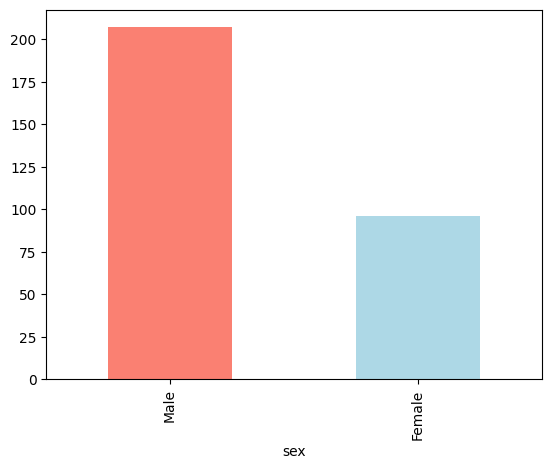

In [8]:
df.sex.value_counts().plot(kind='bar' ,color=["salmon", "lightblue"] , )
plt.xticks([1 , 0] , ['Female' , 'Male'])

plt.show()

In [9]:
pd.crosstab(df.sex , df.target) 

target,0,1
sex,,
0,24,72
1,114,93


Sex with target

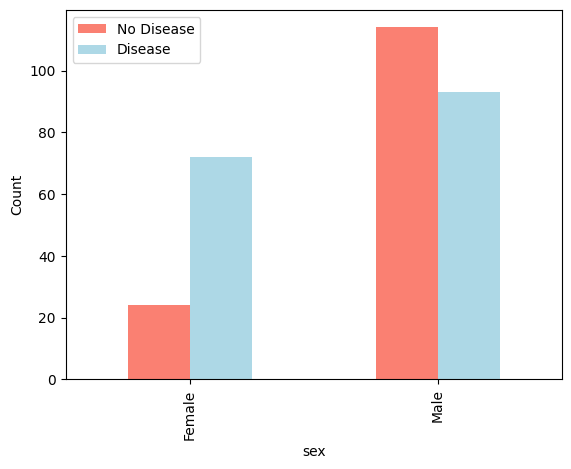

In [10]:
pd.crosstab(df.sex , df.target).plot(kind='bar' ,color=["salmon", "lightblue"]  )
plt.legend(labels=['No Disease' , 'Disease' ])
plt.xticks([0,1] , ['Female' , 'Male'])
plt.ylabel('Count')
plt.show()

In [11]:
pd.crosstab(df.target , df.sex)

sex,0,1
target,,
0,24,114
1,72,93


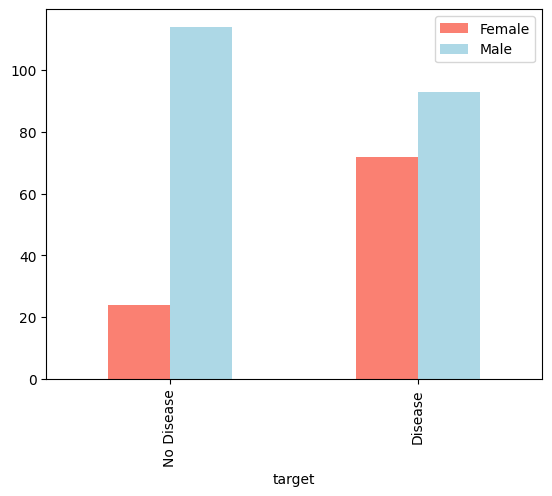

In [12]:
pd.crosstab(df.target , df.sex).plot(kind='bar' ,color=["salmon", "lightblue"]  )
plt.legend(labels=['Female' , 'Male' ])
plt.xticks([0,1] , ['No Disease' , 'Disease'])
plt.show()

Comparaing age with thaalach (with target)

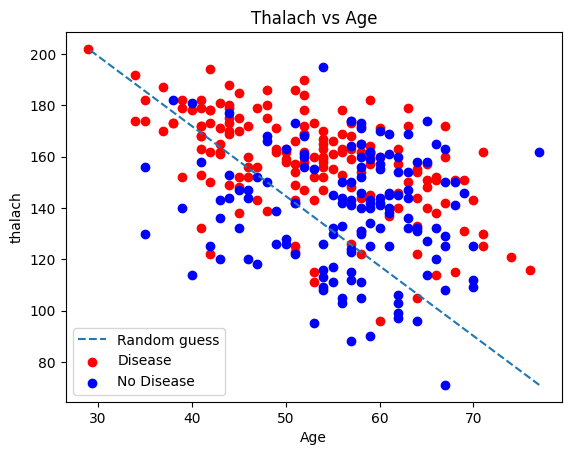

In [13]:
plt.plot([df.age.max() , df.age.min() ] ,[df.thalach.min() , df.thalach.max()]  , linestyle='--' , label='Random guess')
#have  a heart disease
plt.scatter(df.age[df.target == 1] , df.thalach[df.target == 1] , color='red' , label='Disease')

#don't have a heart disease
plt.scatter(df.age[df.target == 0] , df.thalach[df.target == 0] , color='blue' , label='No Disease')


plt.xlabel('Age')
plt.ylabel('thalach')
plt.title('Thalach vs Age')

 
plt.legend(loc='lower left')
plt.show()

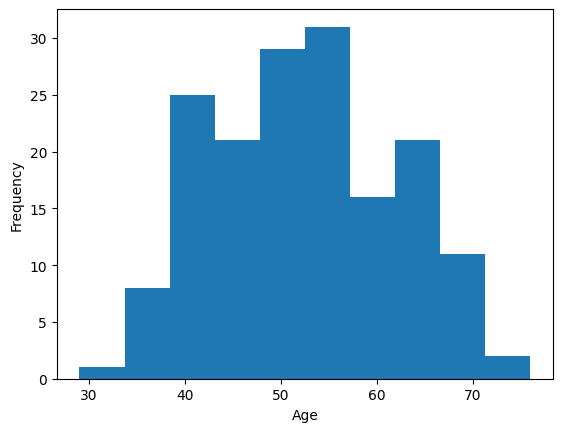

In [14]:
#check age distribution

df.age[df.target == 1].plot.hist()
plt.xlabel('Age')

plt.show()

In [15]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


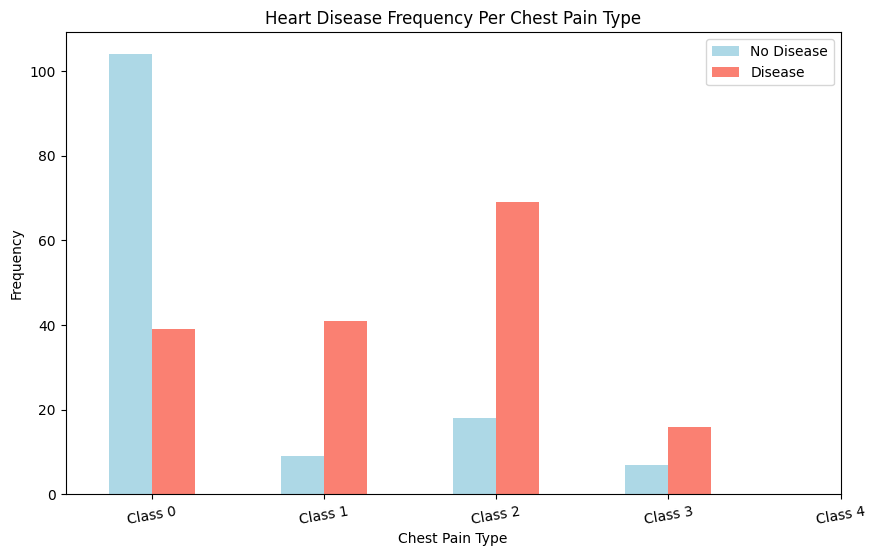

In [16]:
# Create a new crosstab and base plot
pd.crosstab(df.cp, df.target).plot(kind="bar", 
                                   figsize=(10,6), 
                                   color=["lightblue", "salmon"])

# Add attributes to the plot to make it more readable
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Frequency")
plt.legend(["No Disease", "Disease"])


plt.xticks( [x for x in range(5)] , [f'Class {x}' for x in range(0,5)] , rotation=10 )

plt.show()


### Correlation between independent variables

In [17]:
corr_matrix = df.corr()
corr_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


<div style="background-color:rgb(29, 207, 165); padding: 10px; color : #fff;" >
Visualize correlation using seaborn heatmap
</div>

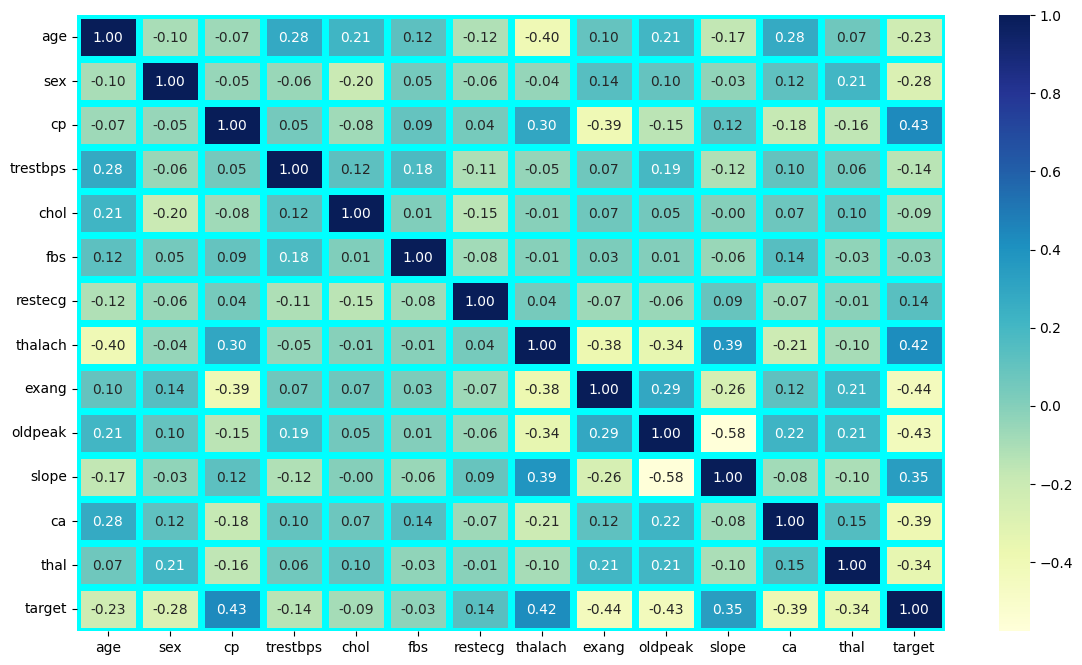

In [18]:
fig , ax = plt.subplots(figsize=(14 , 8))

sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f", # format string to 2 decimal places
    linewidths=5, # maybe similar to padding
    cmap="YlGnBu", # color scheme : Yellow-Green-Blue
    linecolor="cyan"
)

plt.show()

<div style = "background-color:rgb(107, 107, 107); padding: 10px ; color : #fff">
Correlation tells:

1. Strength of the relationship
How strongly two variables move together.

2. Direction of the relationship
Whether they move in the same or opposite directions.


📈 Higher positive value (close to +1):
Variables increase together.

Example: height and weight often have a positive correlation — taller people tend to weigh more.

📉 Lower or negative value (close to -1):
One variable increases while the other decreases.

Example: hours watching Netflix vs test scores might show a negative correlation — more time watching, lower scores.
</div>